<a href="https://colab.research.google.com/github/uvasabri/HackCville---Node-A/blob/master/SS_Machine_Learning_Data_Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
import numpy as np

In [0]:
#Import weather data
weather = pd.read_csv("node_s19_ml_competition_train.csv")

In [0]:
#View first five results of weather data
weather.head(15)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-07-31,3.8,21.1,0.0,2.4,9.7,SSW,19.0,NaN,S,...,74.0,38.0,1026.9,1023.9,1.0,0.0,11.7,20.2,No,No
1,2011-10-09,13.7,23.5,0.2,NaN,NaN,WSW,31.0,WNW,W,...,81.0,39.0,1008.6,1004.9,NaN,NaN,17.1,22.6,No,No
2,2011-10-25,2.8,16.5,2.2,3.4,11.1,SW,41.0,NNW,SE,...,55.0,41.0,1018.2,1016.9,NaN,NaN,8.7,15.6,Yes,No
3,2010-12-19,15.0,29.0,NaN,NaN,5.7,ESE,59.0,E,ESE,...,35.0,20.0,1012.0,1008.4,NaN,NaN,22.3,28.5,NaN,Yes
4,2016-02-05,16.3,32.0,0.0,5.4,12.9,NaN,NaN,E,NaN,...,80.0,NaN,1015.5,1014.7,0.0,NaN,21.0,NaN,No,No
5,2010-05-20,11.5,21.0,0.0,1.4,5.0,ESE,24.0,NNE,NW,...,54.0,44.0,1022.2,1020.0,NaN,NaN,14.9,20.3,No,No
6,2016-07-27,9.1,14.1,10.4,NaN,NaN,SW,39.0,SSW,WSW,...,68.0,57.0,1022.7,1025.3,NaN,NaN,11.3,13.2,Yes,No
7,2011-11-20,17.0,19.5,5.0,NaN,NaN,NW,35.0,N,NNW,...,79.0,79.0,1010.4,1011.3,NaN,NaN,19.3,16.3,Yes,Yes
8,2016-11-07,2.4,15.8,0.0,NaN,NaN,WNW,61.0,WNW,WNW,...,72.0,53.0,NaN,NaN,NaN,NaN,8.5,14.8,No,No
9,2008-09-03,3.2,12.1,0.0,2.8,3.9,ESE,41.0,SE,SE,...,69.0,51.0,1033.6,1033.2,7.0,5.0,9.3,11.1,No,No


In [0]:
#View the data size
weather.size

2189770

In [0]:
#View the shape of the dataset
weather.shape

(99535, 22)

In [0]:
#View columns of datset
weather.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [0]:
#convert date string to float
weather['Date'] = pd.to_datetime(arg=weather['Date'])


In [0]:
#separating the months into a descrete column as this data may be valuable in determining rain
weather["Month"] = weather["Date"].dt.month


In [0]:
#deleting the 'Date' column as it causes problems later on in scaling
del weather['Date']


In [0]:
#Check for null values
print('Let\'s check for null values\n')
print(weather.isnull().sum())

Let's check for null values

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6489
WindGustSpeed       0
WindDir9am       7017
WindDir3pm       2634
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1034
RainTomorrow        0
Month               0
dtype: int64


In [0]:
#Handle missing values. Fill the missing values with “mean” of the respective column.
from sklearn.preprocessing import Imputer

missingValuesImputer = Imputer (missing_values = 'NaN', strategy= 'mean', axis =0) #Initializing object

missingValuesImputer = missingValuesImputer.fit(weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])
weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']] = missingValuesImputer.transform(weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])

In [0]:
#Dropna for remaining Rain Data
weather.dropna(inplace=True)


In [0]:
#converting rain data into binary information
weather['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [0]:
#Check for null values after replacing the null values w/ the mean of the column
print('Let\'s check for null values\n')
print(weather.isnull().sum())

Let's check for null values

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64


In [0]:
#View data types of all columns in dataset
weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Month              int64
dtype: object

In [0]:
#Convert objects to strings
#from sklearn.preprocessing import LabelEncoder
#enc = LabelEncoder()
#weather['WindGustDir'] = enc.fit_transform(weather['WindGustDir'].astype(str))
#weather['WindDir9am'] = enc.fit_transform(weather['WindDir9am'].astype(str))
#weather['WindDir3pm'] = enc.fit_transform(weather['WindDir3pm'].astype(str))
#weather['RainToday'] = enc.fit_transform(weather['RainToday'].astype(str))
#weather['RainTomorrow'] = enc.fit_transform(weather['RainTomorrow'].astype(str))

In [0]:
#View data types of all columns in dataset after conversion
weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Month              int64
dtype: object

In [0]:
#Encode categorical data - Convert categorical column in the dataset to numerical data.
#weather['WindGustDir'] = enc.fit_transform(weather['WindGustDir'])
#weather['WindDir9am'] = enc.fit_transform(weather['WindDir9am'])
#weather['WindDir3pm'] = enc.fit_transform(weather['WindDir3pm'])
#weather['RainToday'] = enc.fit_transform(weather['RainToday'])
#weather['RainTomorrow'] = enc.fit_transform(weather['RainTomorrow'])

#enc.classes_ #Maintains the information of the encoded values. Encode a non-numerical data into a numerical data


#weather.head(15)
#Notice how all of the non-numerical columns are now numerical


In [0]:
#See unique values and convert them to int using pd.getDummies()
import numpy as np
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Month']
weather2 = pd.get_dummies(weather, columns=categorical_columns)


In [0]:
weather2.head(50)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
1,13.7,23.5,0.2,5.473139,7.603419,31.0,7.0,11.0,81.0,39.0,...,0,0,0,0,0,0,0,1,0,0
2,2.8,16.5,2.2,3.400000,11.100000,41.0,19.0,9.0,55.0,41.0,...,0,0,0,0,0,0,0,1,0,0
5,11.5,21.0,0.0,1.400000,5.000000,24.0,6.0,9.0,54.0,44.0,...,0,0,1,0,0,0,0,0,0,0
6,9.1,14.1,10.4,5.473139,7.603419,39.0,9.0,13.0,68.0,57.0,...,0,0,0,0,1,0,0,0,0,0
7,17.0,19.5,5.0,5.473139,7.603419,35.0,9.0,11.0,79.0,79.0,...,0,0,0,0,0,0,0,0,1,0
8,2.4,15.8,0.0,5.473139,7.603419,61.0,19.0,24.0,72.0,53.0,...,0,0,0,0,0,0,0,0,1,0
9,3.2,12.1,0.0,2.800000,3.900000,41.0,17.0,20.0,69.0,51.0,...,0,0,0,0,0,0,1,0,0,0
10,8.9,21.5,0.0,2.600000,4.500000,20.0,9.0,11.0,80.0,57.0,...,0,0,1,0,0,0,0,0,0,0
11,23.1,32.5,0.0,9.800000,9.900000,35.0,15.0,28.0,65.0,60.0,...,0,0,0,0,0,0,0,0,1,0
12,11.7,20.4,0.0,5.473139,7.603419,22.0,11.0,6.0,80.0,88.0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
weather2.dtypes

MinTemp            float64
MaxTemp            float64
Rainfall           float64
Evaporation        float64
Sunshine           float64
WindGustSpeed      float64
WindSpeed9am       float64
WindSpeed3pm       float64
Humidity9am        float64
Humidity3pm        float64
Pressure9am        float64
Pressure3pm        float64
Cloud9am           float64
Cloud3pm           float64
Temp9am            float64
Temp3pm            float64
RainToday            int64
RainTomorrow         int64
WindGustDir_E        uint8
WindGustDir_ENE      uint8
WindGustDir_ESE      uint8
WindGustDir_N        uint8
WindGustDir_NE       uint8
WindGustDir_NNE      uint8
WindGustDir_NNW      uint8
WindGustDir_NW       uint8
WindGustDir_S        uint8
WindGustDir_SE       uint8
WindGustDir_SSE      uint8
WindGustDir_SSW      uint8
                    ...   
WindDir3pm_WNW       uint8
WindDir3pm_WSW       uint8
WindDir9am_E         uint8
WindDir9am_ENE       uint8
WindDir9am_ESE       uint8
WindDir9am_N         uint8
W

In [0]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weather2)
weather_scaled = pd.DataFrame(scaler.transform(weather2), index=weather2.index, columns=weather2.columns)


In [0]:
#now the data is scaled on a value from 0 to 1
weather_scaled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
1,0.520190,0.534972,0.000544,0.063493,0.524374,0.195122,0.058824,0.121622,0.81,0.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.261283,0.402647,0.005985,0.039443,0.765517,0.276423,0.200000,0.094595,0.55,0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.467933,0.487713,0.000000,0.016241,0.344828,0.138211,0.047059,0.094595,0.54,0.44,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.410926,0.357278,0.028292,0.063493,0.524374,0.260163,0.082353,0.148649,0.68,0.57,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.598575,0.459357,0.013602,0.063493,0.524374,0.227642,0.082353,0.121622,0.79,0.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
#Check for null values again after implementing Imputer
print('Let\'s check for null values\n')
print(weather.isnull().sum())
#As you can see fromt the table below, the NaN have been replaced by the mean of that column

Let's check for null values

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64


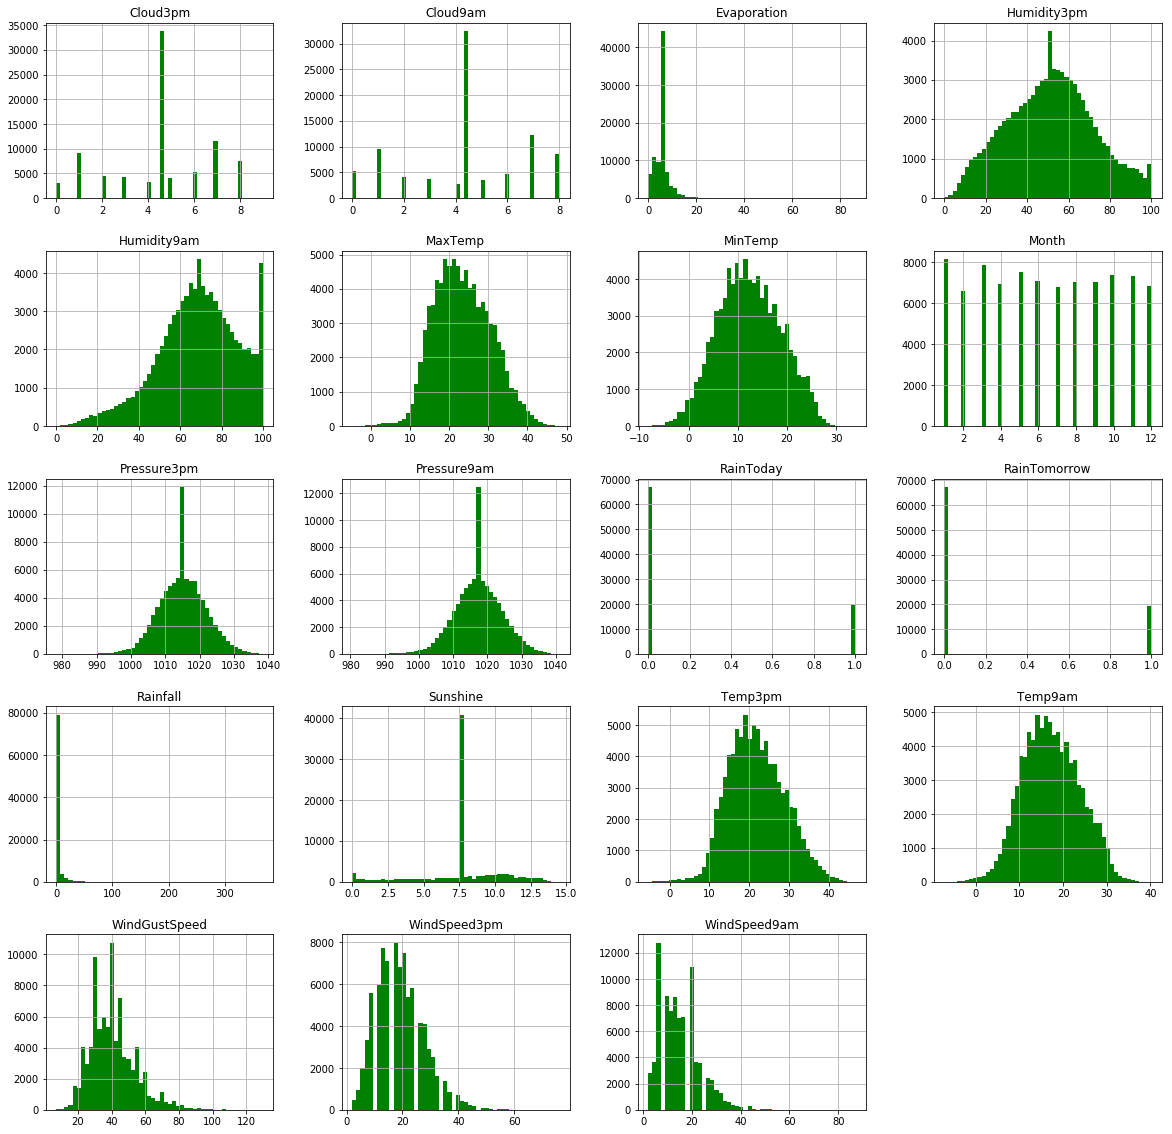

In [0]:
#Visualize distribution of results
weather.hist(bins=50, figsize=(20,20), color = 'green');

In [0]:
#High level understanding of correlation among all the variables
weather.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
MinTemp,1.000000,0.738268,0.102080,0.360234,0.056942,0.144498,0.141343,0.154825,-0.216066,-0.000387,-0.415882,-0.431424,0.050392,0.008822,0.896004,0.706018,0.044957,0.078432,-0.205943
MaxTemp,0.738268,1.000000,-0.076432,0.449532,0.339273,0.043156,-0.010398,0.026266,-0.504138,-0.508149,-0.298867,-0.393491,-0.235575,-0.223292,0.888081,0.974906,-0.237218,-0.168253,-0.163373
Rainfall,0.102080,-0.076432,1.000000,-0.041807,-0.178938,0.128655,0.083762,0.060796,0.238227,0.258533,-0.163393,-0.123017,0.174268,0.147895,0.006433,-0.080182,0.500385,0.240841,-0.037809
Evaporation,0.360234,0.449532,-0.041807,1.000000,0.290741,0.140735,0.131131,0.082301,-0.383506,-0.296815,-0.205024,-0.226583,-0.166309,-0.157931,0.423068,0.435187,-0.146578,-0.093131,-0.020026
Sunshine,0.056942,0.339273,-0.178938,0.290741,1.000000,-0.032371,-0.001690,0.028045,-0.363395,-0.456999,0.038547,-0.009109,-0.549871,-0.566167,0.218696,0.357152,-0.243786,-0.338058,0.016908
WindGustSpeed,0.144498,0.043156,0.128655,0.140735,-0.032371,1.000000,0.591770,0.674856,-0.180038,-0.014664,-0.424623,-0.380721,0.061383,0.089186,0.112313,0.008579,0.150784,0.234799,0.055853
WindSpeed9am,0.141343,-0.010398,0.083762,0.131131,-0.001690,0.591770,1.000000,0.504567,-0.220382,-0.015224,-0.194804,-0.145000,0.022766,0.044992,0.084921,-0.019578,0.097729,0.092143,0.039017
WindSpeed3pm,0.154825,0.026266,0.060796,0.082301,0.028045,0.674856,0.504567,1.000000,-0.100669,0.042988,-0.271894,-0.232860,0.050278,0.029615,0.134363,0.005347,0.083725,0.093886,0.057833
Humidity9am,-0.216066,-0.504138,0.238227,-0.383506,-0.363395,-0.180038,-0.220382,-0.100669,1.000000,0.678461,0.109456,0.159615,0.367249,0.285734,-0.461846,-0.498694,0.375132,0.272966,-0.087294
Humidity3pm,-0.000387,-0.508149,0.258533,-0.296815,-0.456999,-0.014664,-0.015224,0.042988,0.678461,1.000000,-0.032171,0.045553,0.408693,0.413584,-0.228250,-0.560607,0.386267,0.453424,-0.018348


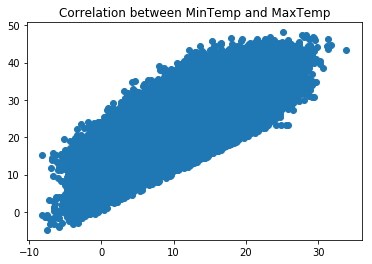

In [0]:
#Plot scatter plot between MinTemp and MaxTemp, per the correlation table
plt.scatter(weather['MinTemp'],weather['MaxTemp'])
plt.title('Correlation between MinTemp and MaxTemp')
plt.show()

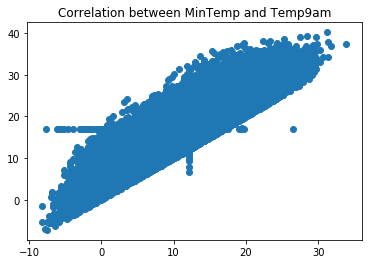

In [0]:
#Plot scatter plot between MinTemp and Temp9am, per the correlation table
plt.scatter(weather['MinTemp'],weather['Temp9am'])
plt.title('Correlation between MinTemp and Temp9am')
plt.show()

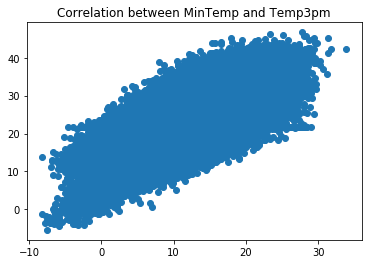

In [0]:
#Plot scatter plot between MinTemp and Temp3pm, per the correlation table
plt.scatter(weather['MinTemp'],weather['Temp3pm'])
plt.title('Correlation between MinTemp and Temp3pm')
plt.show()

In [0]:
#Create a feature df from the columns (w/o date)
features = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']]

In [0]:
#create target objects
y_target1 = weather[['RainToday']]
y_target2 = weather[['RainTomorrow']]

In [0]:
#Split test and training data for target object 1
#By default 75% training data and 25% testing data but we will do 80% training data and 20% testing data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    y_target1,
                                                    test_size=.2,
                                                    random_state=1)

/Users/SumSum/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
#view shape of train and test data sets for both feature and response
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [0]:
#train a logistic regression model on the training set
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

In [0]:
#make predictions for the testing set
y_predict = logReg.predict(x_test)
y_predict

In [0]:
#check for accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_predict))

In [0]:
print(accuracy_score(y_predict, y_test)) # instead of r2_score, categorical variables use the accuracy_score to check accuracy
logReg.score(x_test, y_test)

In [0]:
y_predict = pd.DataFrame(y_predict)
comparison = pd.concat([y_test.reset_index(), y_predict], axis=1).set_index('index') # to show where the differences are
comparison.head(15)